<a href="https://colab.research.google.com/github/nikhilans/CHDRisk-Classification/blob/main/CH_Nikhila_N_S_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning - Capstone Project 1 - Cardiovascular Risk Prediction**

### **Problem Statement** <br>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. <br>

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### **Data Description**

#### **Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### **Behavioral:**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### **Medical( history):**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

#### **Medical(current):**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

#### **Predict variable (desired target):**
**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

### Load the data

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Cardiovascular Risk Prediction - Nikhila N S/data_cardiovascular_risk.csv')

In [ ]:
df.head()

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0   0   64        2.0   F  ...    NaN       90.0     80.0           1
1   1   36        4.0   M  ...  29.77       72.0     75.0           0
2   2   46        1.0   F  ...  20.35       88.0     94.0           0
3   3   50        1.0   M  ...  28.26       68.0     94.0           1
4   4   64        1.0   F  ...  26.42       70.0     77.0           0

[5 rows x 17 columns]

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# check missing-values

df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* We have missing values in Education, cigPerDay, BPMeds, totChol, BMI, heartRate and glucose
* We will analyse these further in the later sections to check how to handle these missing values.

In [ ]:
# list of features in data

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# creating list for numeric and categorical features
# id is a unique identifier; not considering

num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['education', 'sex','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# quick look at numeric features
df[num_cols].describe()

age   cigsPerDay  ...    heartRate      glucose
count  3390.000000  3368.000000  ...  3389.000000  3086.000000
mean     49.542183     9.069477  ...    75.977279    82.086520
std       8.592878    11.879078  ...    11.971868    24.244753
min      32.000000     0.000000  ...    45.000000    40.000000
25%      42.000000     0.000000  ...    68.000000    71.000000
50%      49.000000     0.000000  ...    75.000000    78.000000
75%      56.000000    20.000000  ...    83.000000    87.000000
max      70.000000    70.000000  ...   143.000000   394.000000

[8 rows x 8 columns]

In [ ]:
# quick look at categorical columns

df[cat_cols].describe(include = 'all')

education   sex is_smoking  ...  prevalentHyp     diabetes   TenYearCHD
count   3303.000000  3390       3390  ...   3390.000000  3390.000000  3390.000000
unique          NaN     2          2  ...           NaN          NaN          NaN
top             NaN     F         NO  ...           NaN          NaN          NaN
freq            NaN  1923       1703  ...           NaN          NaN          NaN
mean       1.970936   NaN        NaN  ...      0.315339     0.025664     0.150737
std        1.019081   NaN        NaN  ...      0.464719     0.158153     0.357846
min        1.000000   NaN        NaN  ...      0.000000     0.000000     0.000000
25%        1.000000   NaN        NaN  ...      0.000000     0.000000     0.000000
50%        2.000000   NaN        NaN  ...      0.000000     0.000000     0.000000
75%        3.000000   NaN        NaN  ...      1.000000     0.000000     0.000000
max        4.000000   NaN        NaN  ...      1.000000     1.000000     1.000000

[11 rows x 8 columns]

In [ ]:
# check duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

We have no duplicate records

### Exploratory Data Analysis

#### Univariate Analysis

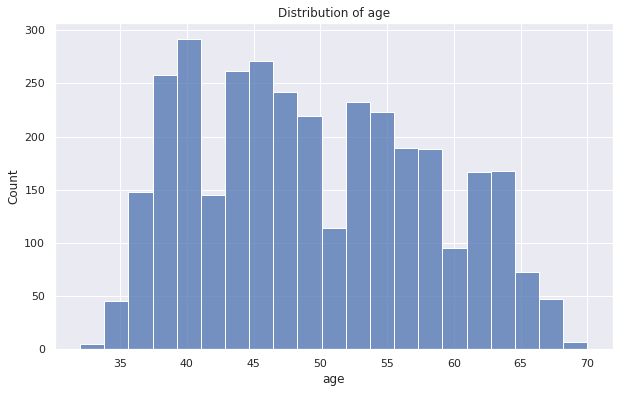

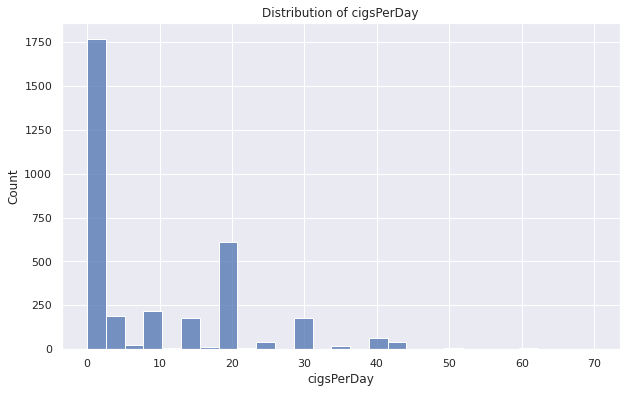

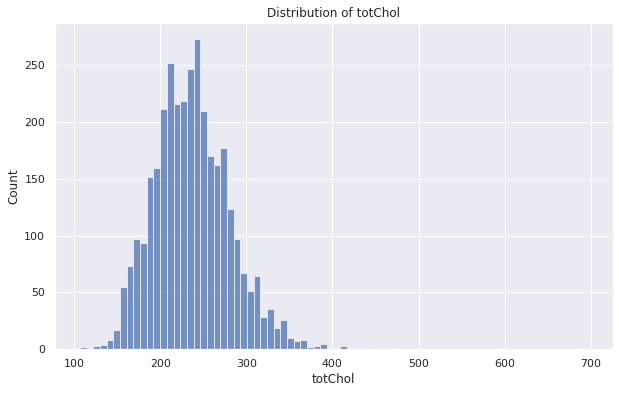

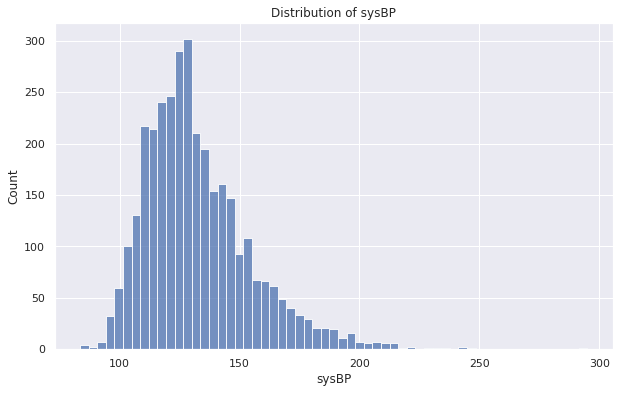

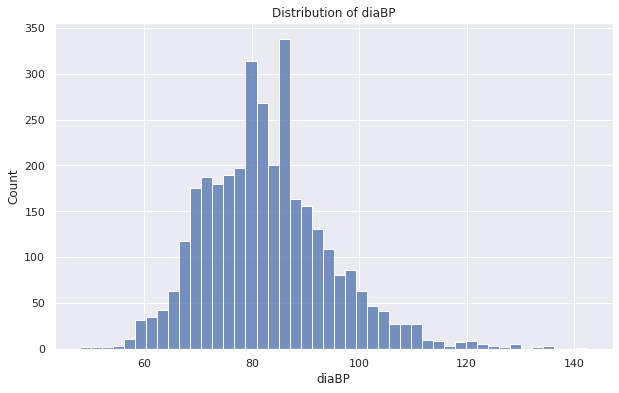

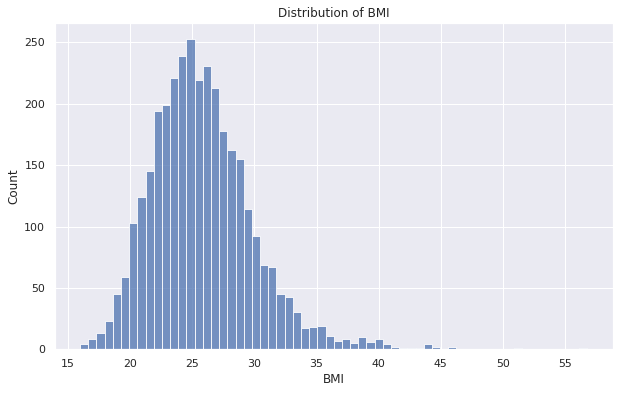

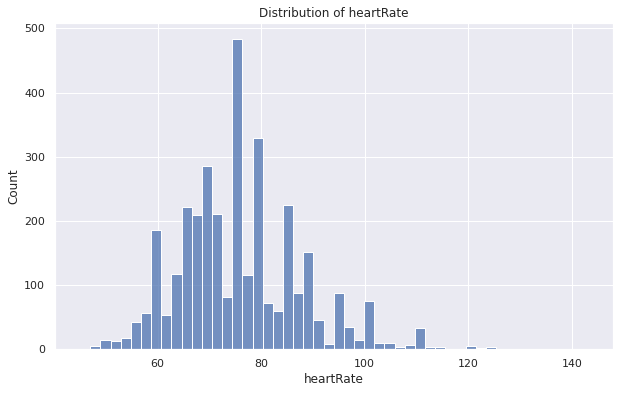

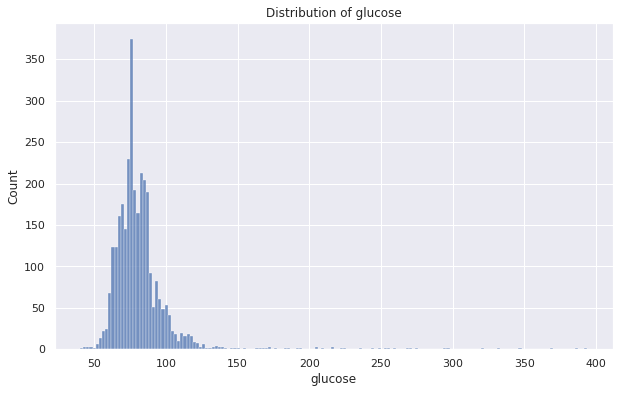

In [ ]:
# visualize the distributions for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

We can see some skewness in the data

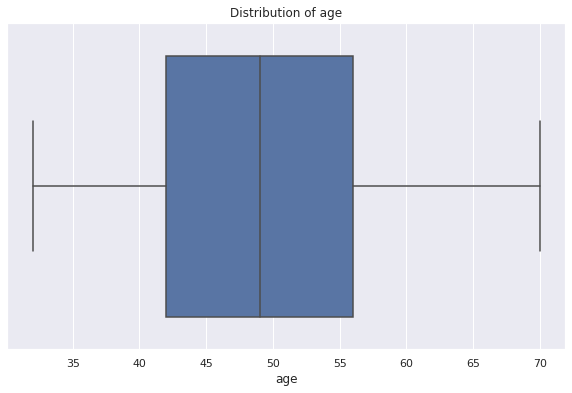

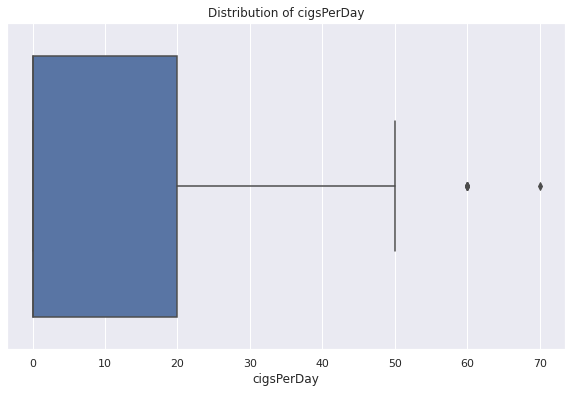

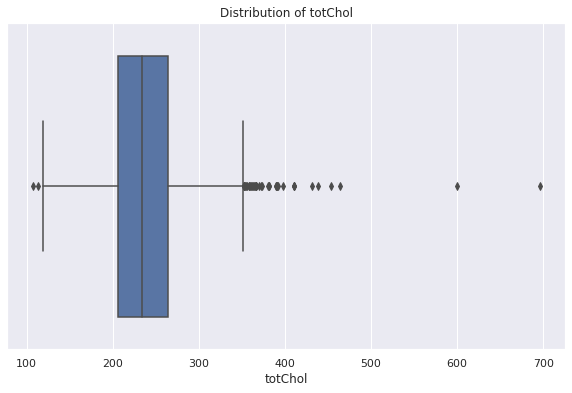

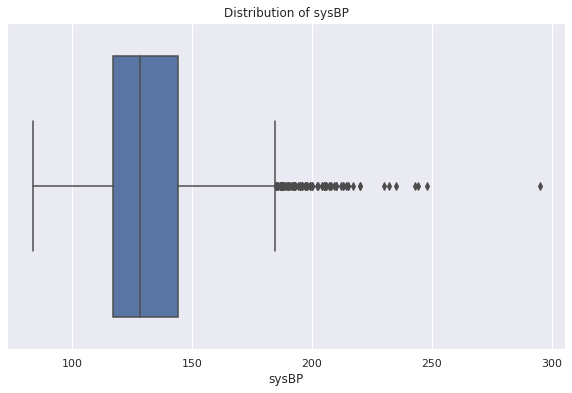

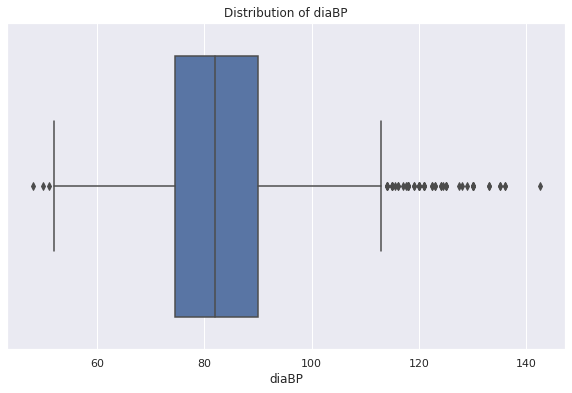

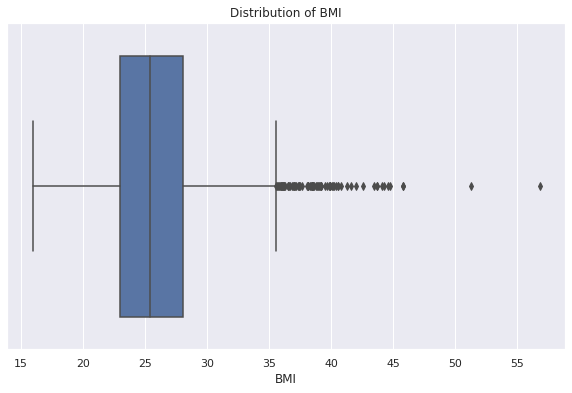

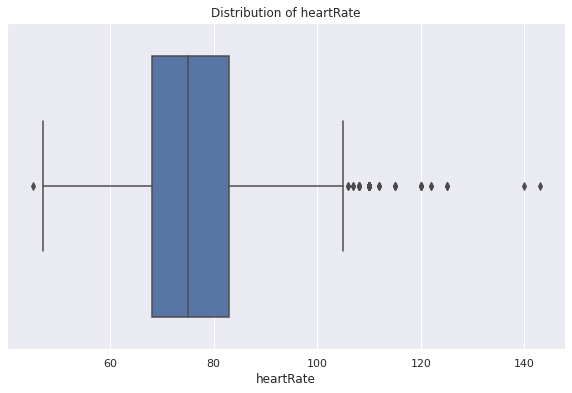

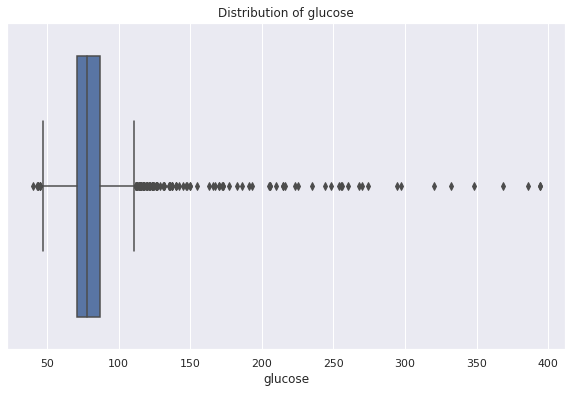

In [ ]:
# Box plot for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.boxplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

* We can see some outliers
* These outliers could be extreme cases.


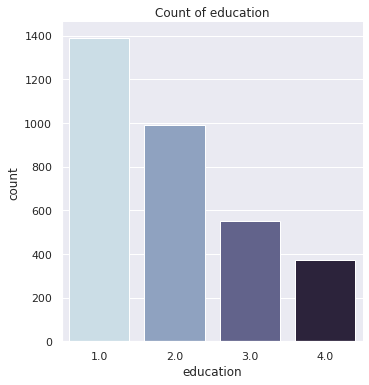

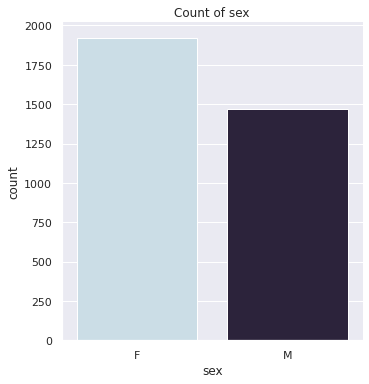

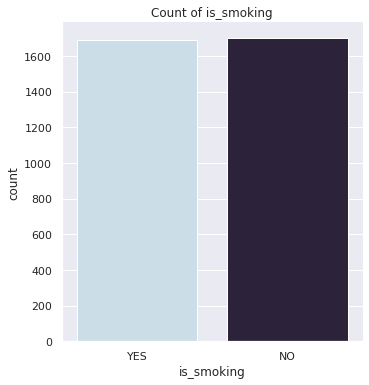

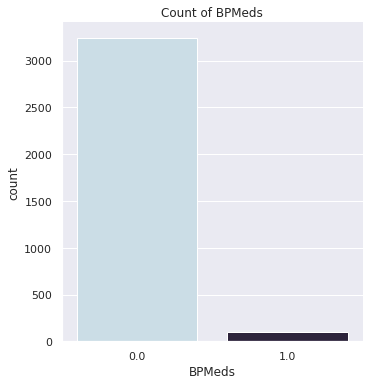

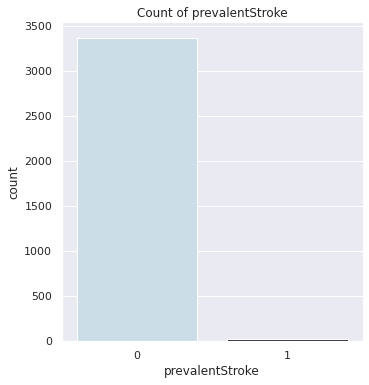

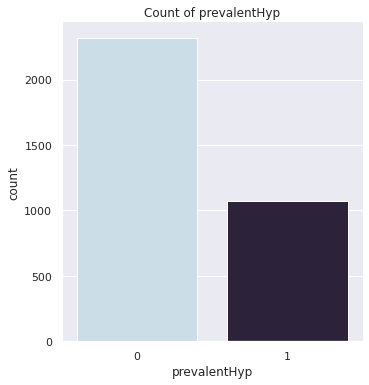

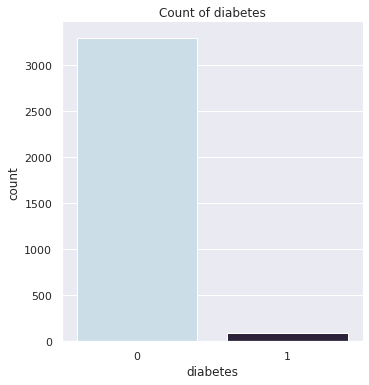

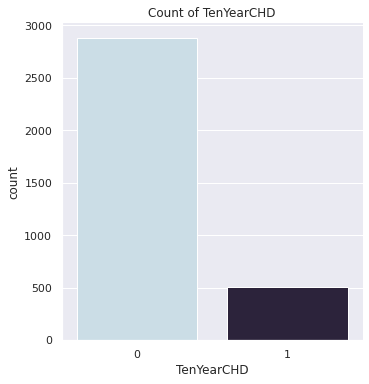

In [ ]:
# Categorical Features

for i, ii in enumerate(cat_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count', palette="ch:s=.25,rot=-.25")
  plt.title(f'Count of {ii}')
  plt.show()

* We have an imbalanced dataset
* We will have to handle this before modelling

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### Bivariate Analysis



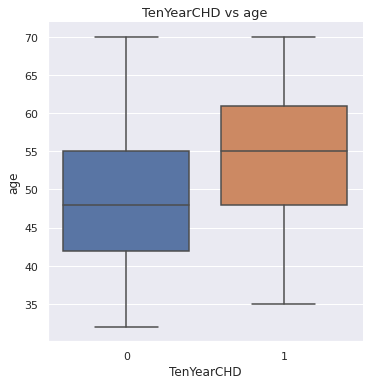

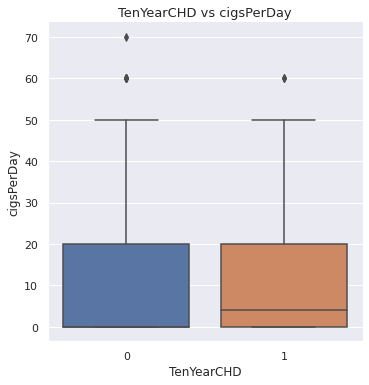

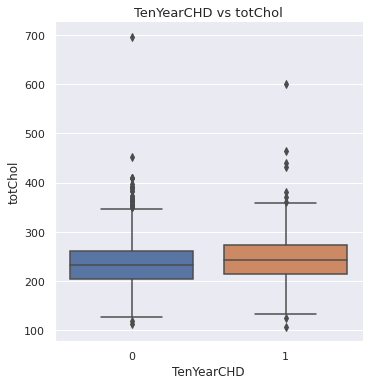

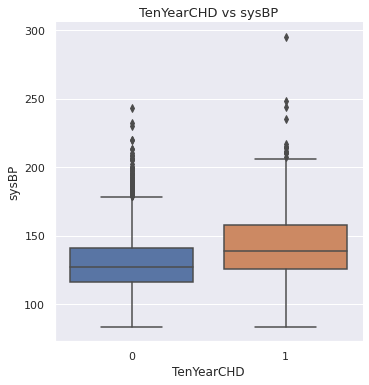

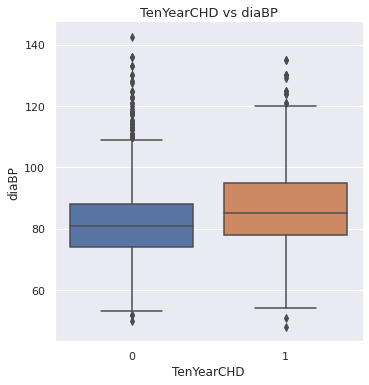

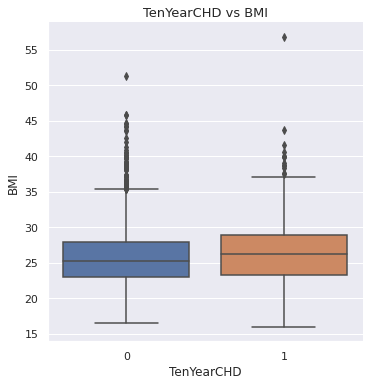

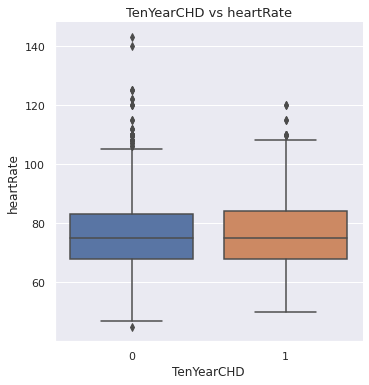

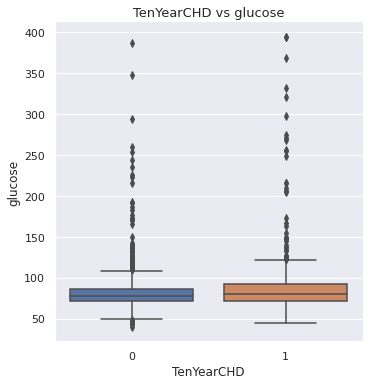

In [ ]:
# Dependent Variable vs numeric features
for i, ii in enumerate(num_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

* We can see that the mean age of people who have a 10-year risk of CHD is higher than those without the risk.
* The average sysBP and diaBP is also higher for those who are classified as having risk of CHD

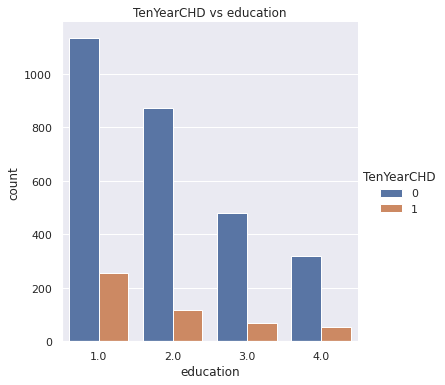

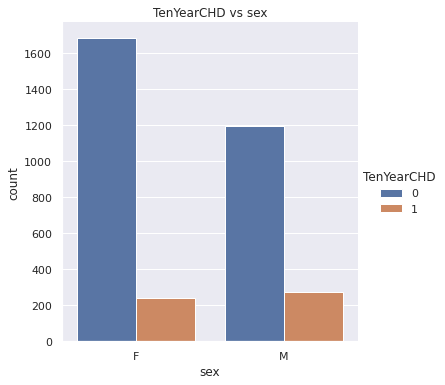

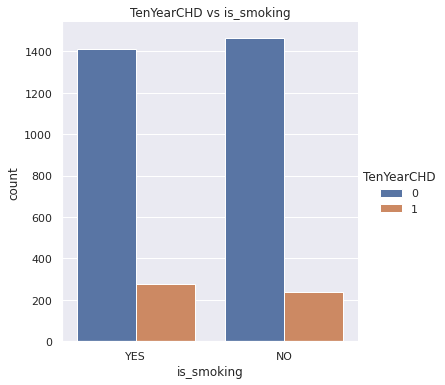

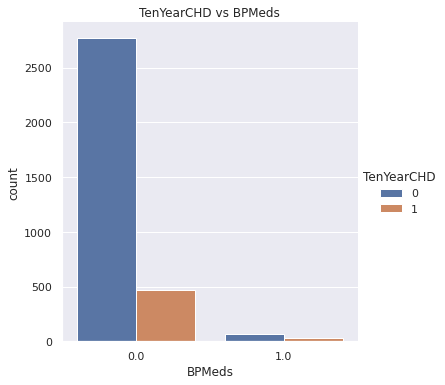

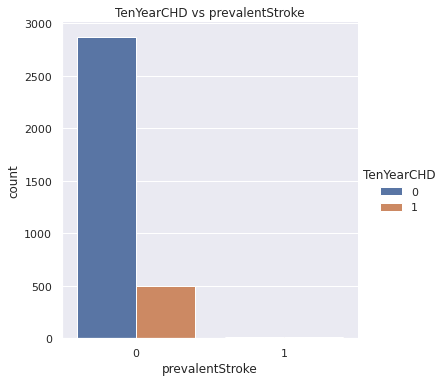

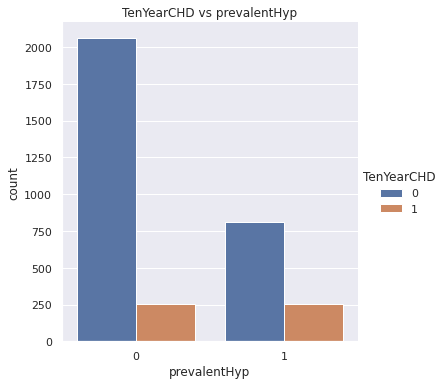

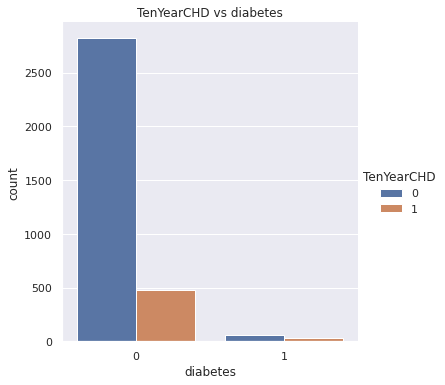

In [ ]:
# Dependent variable vs categorical features

for i, ii in enumerate(cat_cols[:-1]):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, hue=cat_cols[-1], kind='count')
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

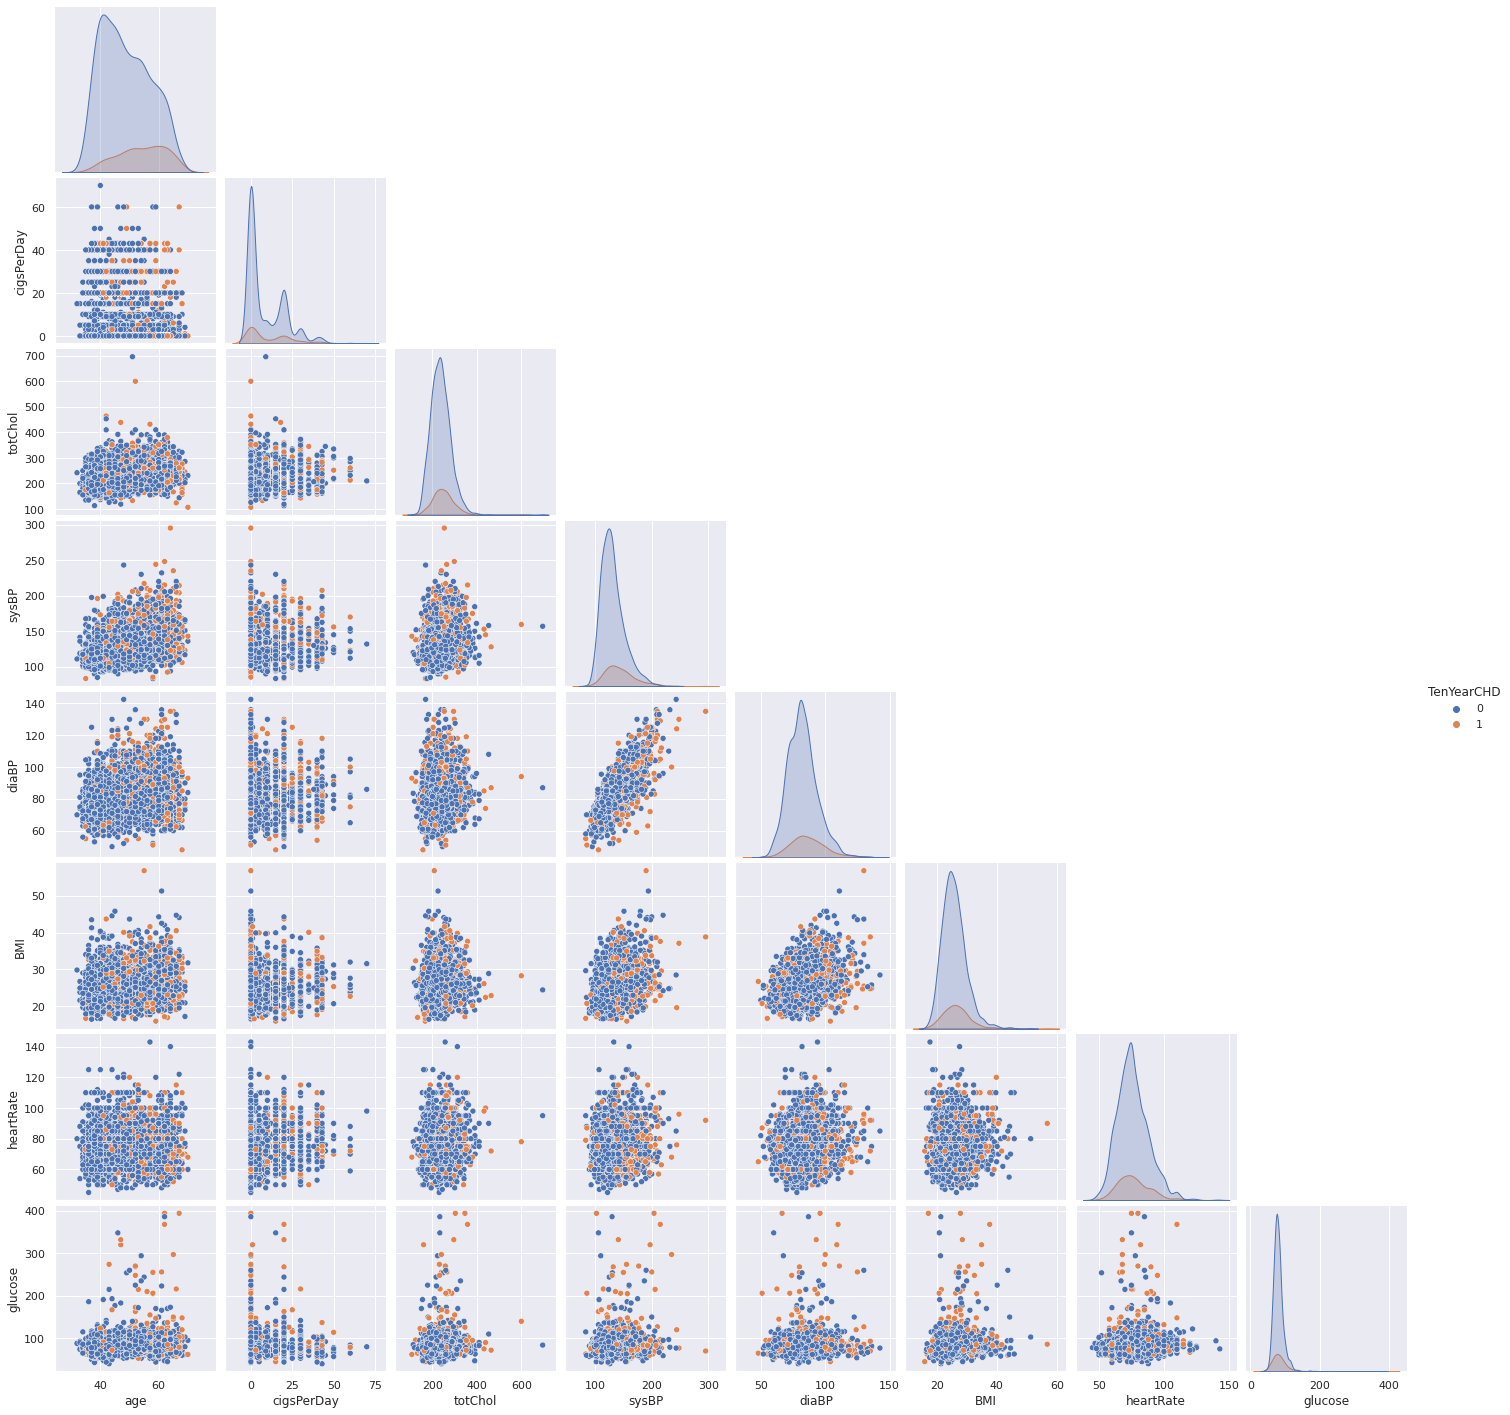

In [ ]:
# pairplot

sns.pairplot(data=df, vars=num_cols, hue=cat_cols[-1], corner=True)
plt.show()

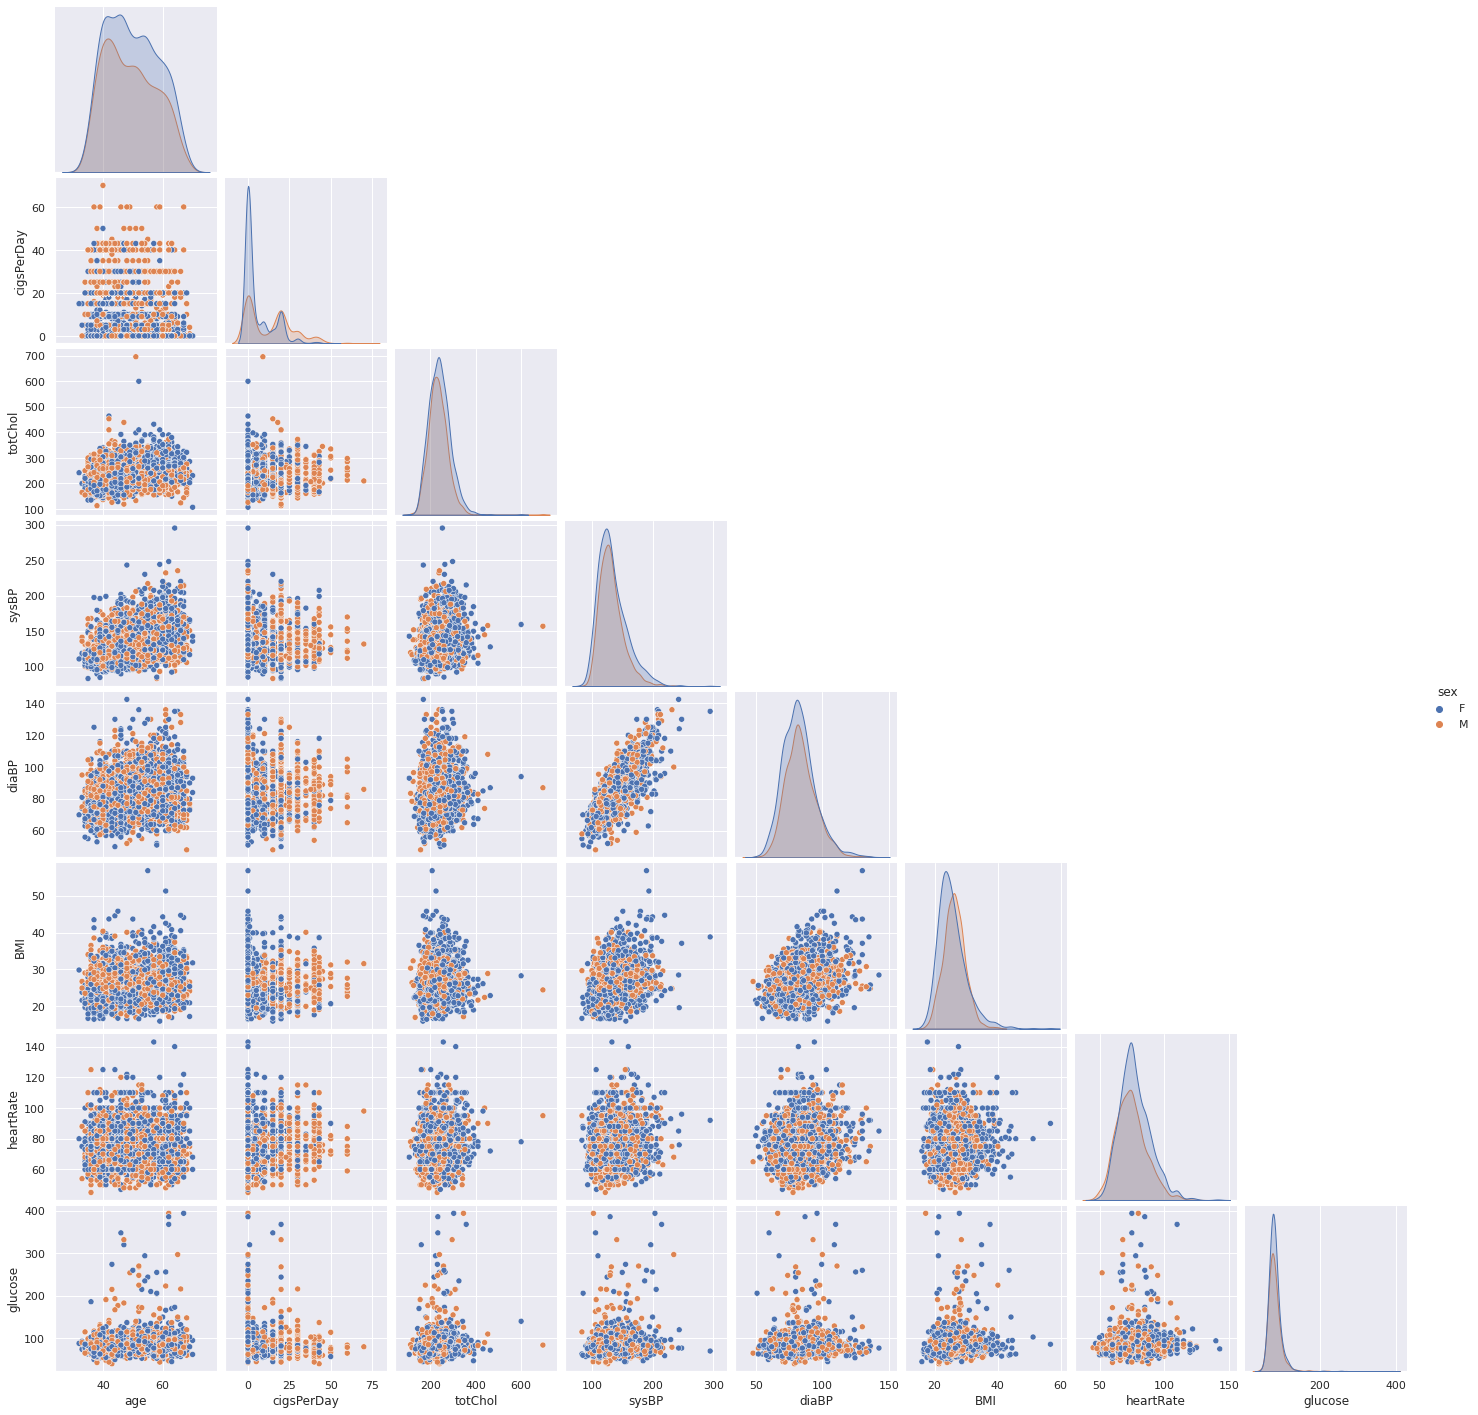

In [ ]:
sns.pairplot(data=df, vars=num_cols, hue='sex', corner=True)
plt.show()

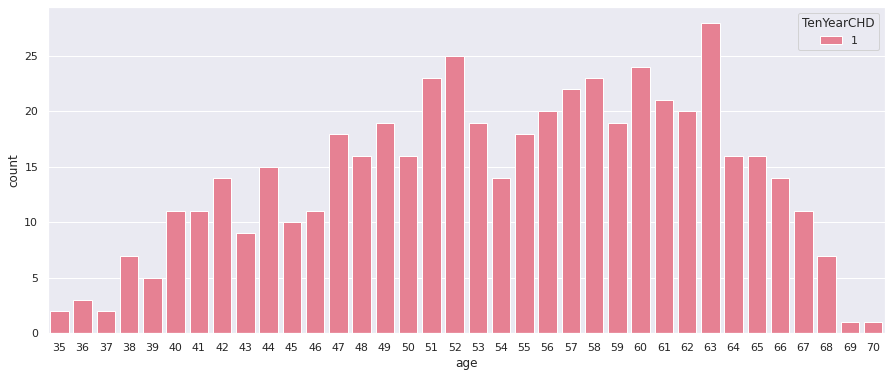

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df['TenYearCHD']==1], hue = 'TenYearCHD', palette='husl')
plt.show()

In [ ]:
df.drop('id', inplace=True, axis=1)

In [ ]:
df['sex_num'] = np.where(df.sex=='F', 1, 0)
df['is_smoking_num'] = np.where(df['is_smoking']=='YES', 1, 0)

In [ ]:
df.head(5)

age  education sex is_smoking  ...  glucose  TenYearCHD  sex_num  is_smoking_num
0   64        2.0   F        YES  ...     80.0           1        1               1
1   36        4.0   M         NO  ...     75.0           0        0               0
2   46        1.0   F        YES  ...     94.0           0        1               1
3   50        1.0   M        YES  ...     94.0           1        0               1
4   64        1.0   F        YES  ...     77.0           0        1               1

[5 rows x 18 columns]

In [ ]:
df_new = df.drop(['sex', 'is_smoking'], axis=1).copy()

In [ ]:
df_new.head()

age  education  cigsPerDay  ...  TenYearCHD  sex_num  is_smoking_num
0   64        2.0         3.0  ...           1        1               1
1   36        4.0         0.0  ...           0        0               0
2   46        1.0        10.0  ...           0        1               1
3   50        1.0        20.0  ...           1        0               1
4   64        1.0        30.0  ...           0        1               1

[5 rows x 16 columns]

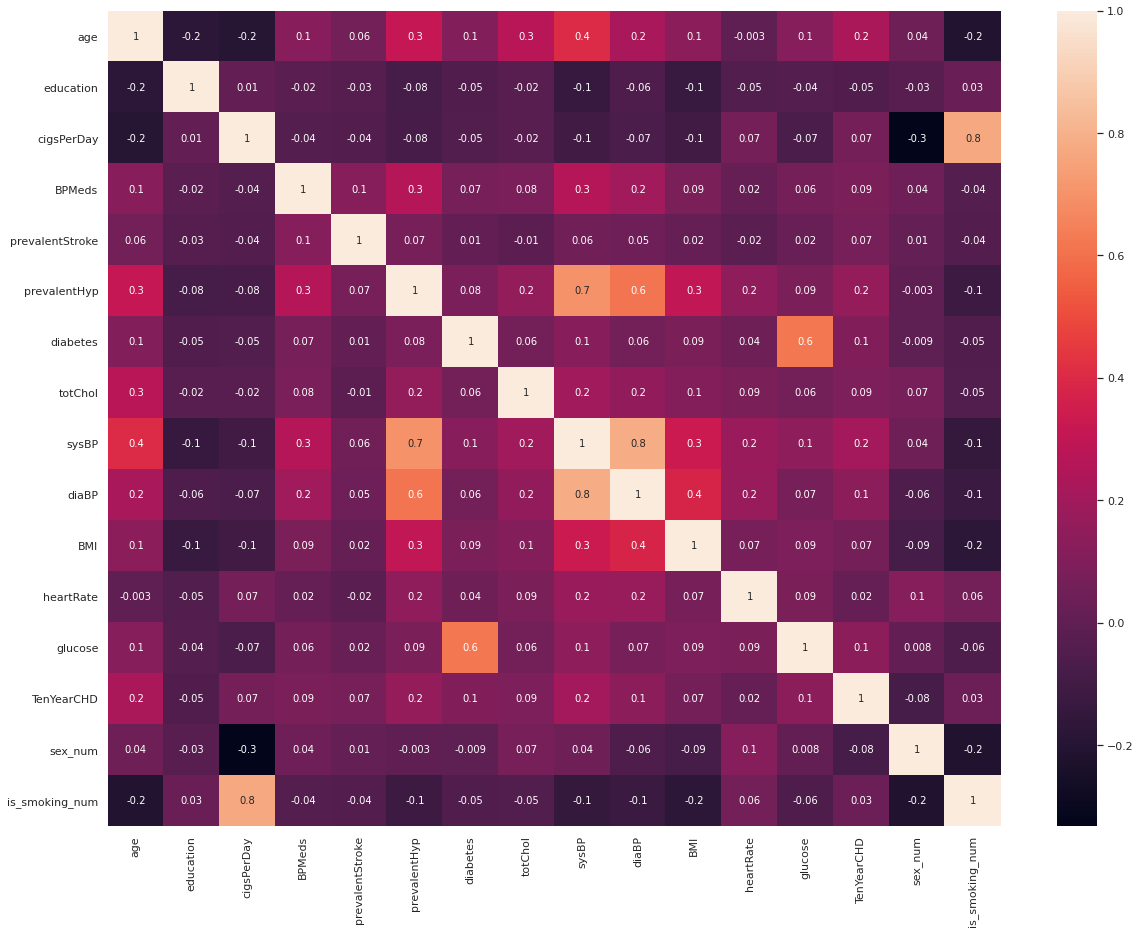

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df_new.corr(), annot = True, fmt='.1g')
plt.show()

* There are no features that have a correlation with the dependant variable. 
* We see some obvious correlations between - sysBP and diaBP and prevalentHP, glucose and diabetes, is_smoking and cigsPerDay

### Data Preprocessing

#### Handling Missing Values

In [ ]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
sex_num              0
is_smoking_num       0
dtype: int64

**Education** <br>
Has 87 missing values. It is a categorical variable. We have no information about this feature. It also has no correlation with the dependant variable. And we have no further information about education. We will drop this feature.

In [ ]:
df.drop('education', inplace=True, axis=1)

**cigsPerDay** <br>
Has 22 missing values. All the 22 records have is_smoking = YES. This is a continuous variable. We check the distribution of the feature when is_smoking = YES. When is_smoking = NO, cigsPerDay will be 0.

In [ ]:
df[df['cigsPerDay'].isnull()]['is_smoking'].value_counts()

YES    22
Name: is_smoking, dtype: int64

In [ ]:
df.groupby(['cigsPerDay','is_smoking'])['cigsPerDay'].count().unstack()

is_smoking      NO    YES
cigsPerDay               
0.0         1703.0    NaN
1.0            NaN   48.0
2.0            NaN   17.0
3.0            NaN   79.0
4.0            NaN    7.0
5.0            NaN  103.0
6.0            NaN   14.0
7.0            NaN    8.0
8.0            NaN   10.0
9.0            NaN  104.0
10.0           NaN  106.0
11.0           NaN    4.0
12.0           NaN    3.0
13.0           NaN    3.0
14.0           NaN    1.0
15.0           NaN  172.0
16.0           NaN    2.0
17.0           NaN    5.0
18.0           NaN    7.0
19.0           NaN    2.0
20.0           NaN  606.0
23.0           NaN    5.0
25.0           NaN   44.0
30.0           NaN  176.0
35.0           NaN   17.0
38.0           NaN    1.0
40.0           NaN   62.0
43.0           NaN   42.0
45.0           NaN    2.0
50.0           NaN    6.0
60.0           NaN    8.0
70.0           NaN    1.0

* As we can see from the table, when is_smoking = NO, the number of cigarettes smoked is 0.
* We can see that the mode of cigsPerDay for the class is_smoking = YES is 20.

In [ ]:
print('is_smoking = YES \n')
print('** mean of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mean())
print('** median of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].median())
print('** mode of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mode())

is_smoking = YES 

** mean of cigsPerDay = 18.345945945945946
** median of cigsPerDay = 20.0
** mode of cigsPerDay = 0    20.0
dtype: float64


We can see that the median and mode are the same, and the mean is pretty close to median and mode. We can impute the missing values with either median or mode, which is 20

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median())

In [ ]:
df.groupby(['cigsPerDay','is_smoking'])['cigsPerDay'].count().unstack()

is_smoking      NO    YES
cigsPerDay               
0.0         1703.0    NaN
1.0            NaN   48.0
2.0            NaN   17.0
3.0            NaN   79.0
4.0            NaN    7.0
5.0            NaN  103.0
6.0            NaN   14.0
7.0            NaN    8.0
8.0            NaN   10.0
9.0            NaN  104.0
10.0           NaN  106.0
11.0           NaN    4.0
12.0           NaN    3.0
13.0           NaN    3.0
14.0           NaN    1.0
15.0           NaN  172.0
16.0           NaN    2.0
17.0           NaN    5.0
18.0           NaN    7.0
19.0           NaN    2.0
20.0           NaN  628.0
23.0           NaN    5.0
25.0           NaN   44.0
30.0           NaN  176.0
35.0           NaN   17.0
38.0           NaN    1.0
40.0           NaN   62.0
43.0           NaN   42.0
45.0           NaN    2.0
50.0           NaN    6.0
60.0           NaN    8.0
70.0           NaN    1.0

**BPMeds** <br>
Has 44 missing values. Impute the missing values with mode - this is a nominal feature.

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

In [ ]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

**totchol** <br>
totchol is a continuous value. There are 38 missing values. It has no correlation with any of the other features.

In [ ]:
df[['totChol']].describe()

totChol
count  3352.000000
mean    237.074284
std      45.247430
min     107.000000
25%     206.000000
50%     234.000000
75%     264.000000
max     696.000000

We can see the mean and median are very close to each other. We will impute the missing values with median.

In [ ]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

**BMI and heartrate** <br>
BMI has 14 missing values and heartrate has 1 missing value. 

In [ ]:
df[['BMI', 'heartRate']].describe()

BMI    heartRate
count  3376.000000  3389.000000
mean     25.794964    75.977279
std       4.115449    11.971868
min      15.960000    45.000000
25%      23.020000    68.000000
50%      25.380000    75.000000
75%      28.040000    83.000000
max      56.800000   143.000000

We will impute the median for missing values in BMI and heartRate.

In [ ]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

**glucose** <br>
Has 304 missing values

In [ ]:
df[df['glucose'].isnull()]['diabetes'].value_counts()

0    301
1      3
Name: diabetes, dtype: int64

In [ ]:
print('diabetes = NO \n')
print('** mean of glucose =', df[df['diabetes']==0]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==0]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==0]['glucose'].mode())

diabetes = NO 

** mean of glucose = 79.57161892071952
** median of glucose = 78.0
** mode of glucose = 0    75.0
dtype: float64


In [ ]:
print('diabetes = YES \n')
print('** mean of glucose =', df[df['diabetes']==1]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==1]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==1]['glucose'].mode())

diabetes = YES 

** mean of glucose = 171.96428571428572
** median of glucose = 150.0
** mode of glucose = 0    120.0
dtype: float64


In [ ]:
df['glucose'] = np.where(df['diabetes']==0, df['glucose'].fillna(df[df['diabetes']==0]['glucose'].median()), df['glucose'].fillna(df[df['diabetes']==1]['glucose'].median()))

In [ ]:
# check if all missing values have been treated

df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
sex_num            0
is_smoking_num     0
dtype: int64

In [ ]:
df.shape

(3390, 17)

#### Creating Bins for cigsPerDay

In [ ]:
df.drop(['sex_num', 'is_smoking_num'], axis=1, inplace=True)

In [ ]:
df.head()

age sex is_smoking  cigsPerDay  ...    BMI  heartRate  glucose  TenYearCHD
0   64   F        YES         3.0  ...  25.38       90.0     80.0           1
1   36   M         NO         0.0  ...  29.77       72.0     75.0           0
2   46   F        YES        10.0  ...  20.35       88.0     94.0           0
3   50   M        YES        20.0  ...  28.26       68.0     94.0           1
4   64   F        YES        30.0  ...  26.42       70.0     77.0           0

[5 rows x 15 columns]

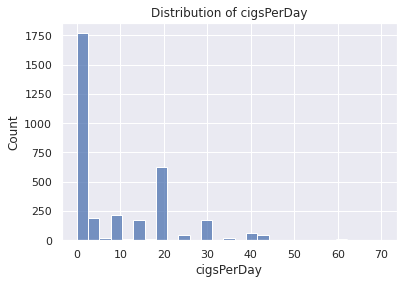

In [ ]:
sns.histplot(data=df, x='cigsPerDay')
plt.title(f'Distribution of cigsPerDay')
plt.show()

In [ ]:
df[df['cigsPerDay']==0]['TenYearCHD'].value_counts()

0    1467
1     236
Name: TenYearCHD, dtype: int64

In [ ]:
df[(df['cigsPerDay']<=20)&(df['cigsPerDay']>0)]['TenYearCHD'].value_counts()

0    1125
1     198
Name: TenYearCHD, dtype: int64

In [ ]:
df[(df['cigsPerDay']>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

We can create 3 categories for cigsPerDay:
* no smoking or cigsPerDay = 0
* number of cigarettes is between 0 and 20
* number of cigarettes above 20

In [ ]:
# function for creating the bins

def no_cigs(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low"
  elif x>20:
    return "high"

df['no_cigs'] = df['cigsPerDay'].apply(no_cigs)
df.head()

age sex is_smoking  cigsPerDay  ...  heartRate  glucose  TenYearCHD  no_cigs
0   64   F        YES         3.0  ...       90.0     80.0           1      low
1   36   M         NO         0.0  ...       72.0     75.0           0     zero
2   46   F        YES        10.0  ...       88.0     94.0           0      low
3   50   M        YES        20.0  ...       68.0     94.0           1      low
4   64   F        YES        30.0  ...       70.0     77.0           0     high

[5 rows x 16 columns]

#### Treating skewness in features 
totChol, sysBP, BMI, heartRate, glucose

We will do a log transformation to reduce the skewness

In [ ]:
print(num_cols)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


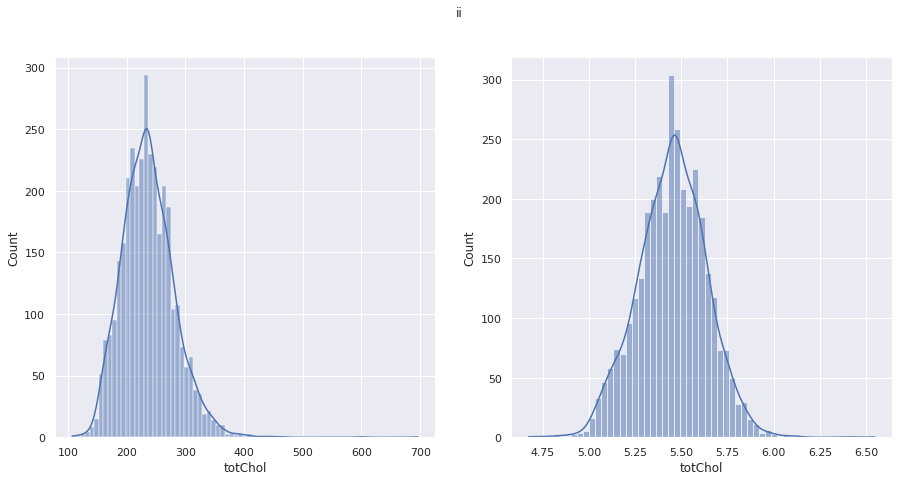

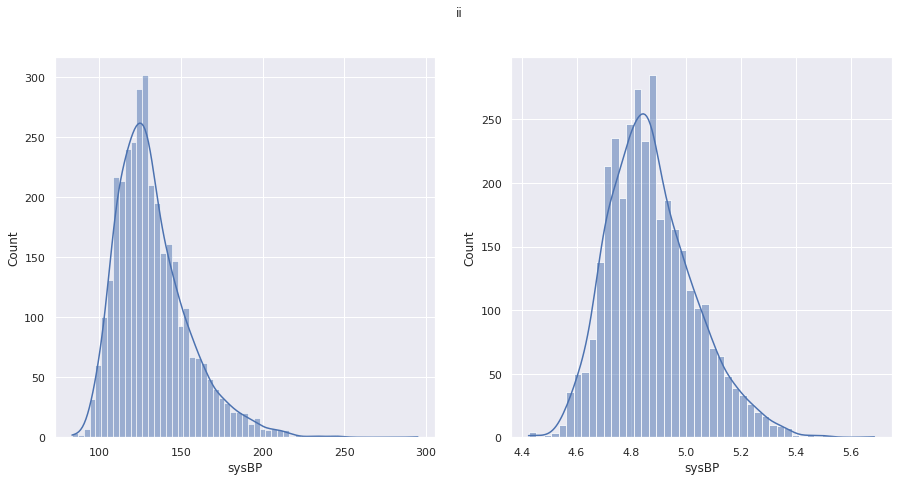

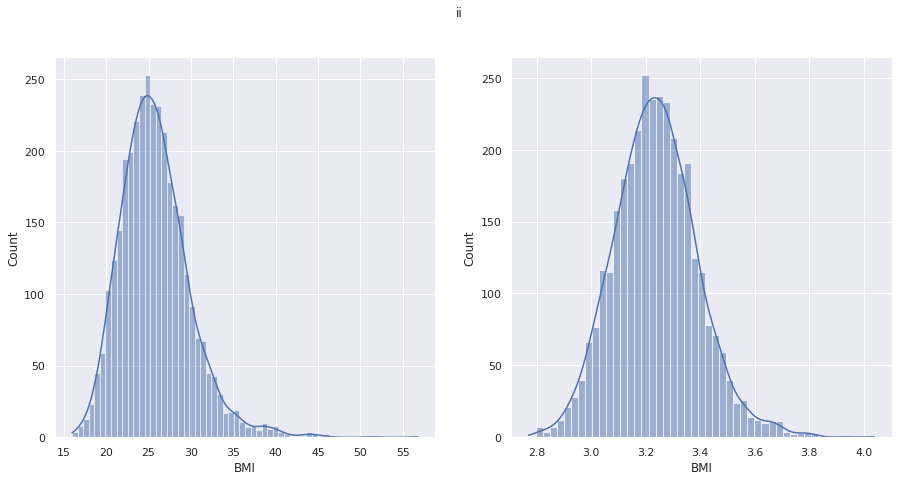

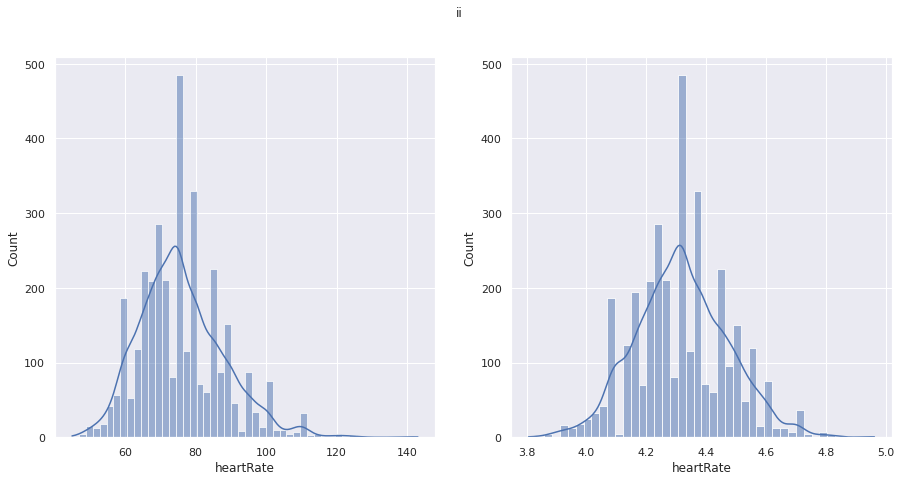

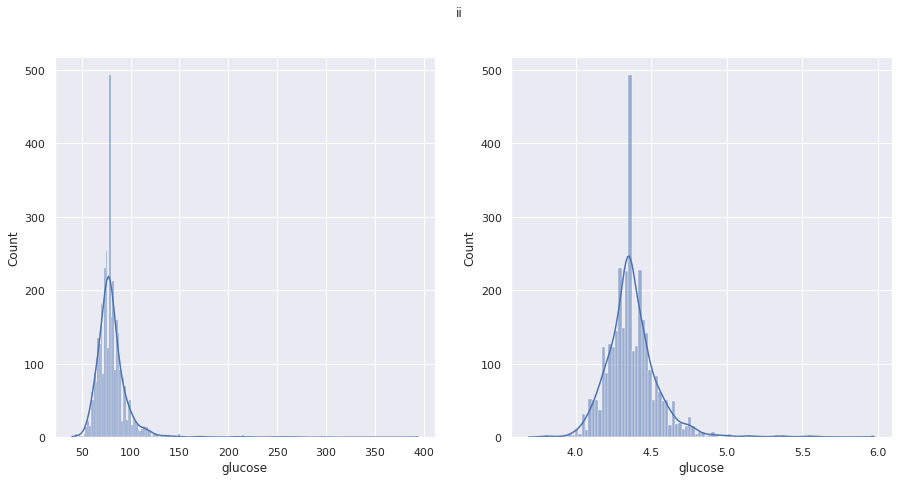

In [ ]:
for i, ii in enumerate(['totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']):

  f, axes = plt.subplots(1, 2, figsize=(15,7))

  f.suptitle('ii')

  sns.histplot(x = df[ii], data=df, kde=True, ax=axes[0])
  sns.histplot(x = np.log(df[ii]), data=df, kde=True, ax=axes[1])

  plt.show()

We can see that some of the skewness in data has been treated after applying log transformation

In [ ]:
for i in ['totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']:
  df[i] = np.log(df[i])

In [ ]:
df.head()

age sex is_smoking  cigsPerDay  ...  heartRate   glucose  TenYearCHD  no_cigs
0   64   F        YES         3.0  ...   4.499810  4.382027           1      low
1   36   M         NO         0.0  ...   4.276666  4.317488           0     zero
2   46   F        YES        10.0  ...   4.477337  4.543295           0      low
3   50   M        YES        20.0  ...   4.219508  4.543295           1      low
4   64   F        YES        30.0  ...   4.248495  4.343805           0     high

[5 rows x 16 columns]

#### One Hot Encoding of categorical features

In [ ]:
df = pd.get_dummies(df, prefix=['sex', 'is_smoking', 'no_cigs'], prefix_sep='_', columns=[ 'sex', 'is_smoking', 'no_cigs'], drop_first=True)

In [ ]:
df.head()

age  cigsPerDay  BPMeds  ...  is_smoking_YES  no_cigs_low  no_cigs_zero
0   64         3.0     0.0  ...               1            1             0
1   36         0.0     0.0  ...               0            0             1
2   46        10.0     0.0  ...               1            1             0
3   50        20.0     0.0  ...               1            1             0
4   64        30.0     0.0  ...               1            0             0

[5 rows x 17 columns]

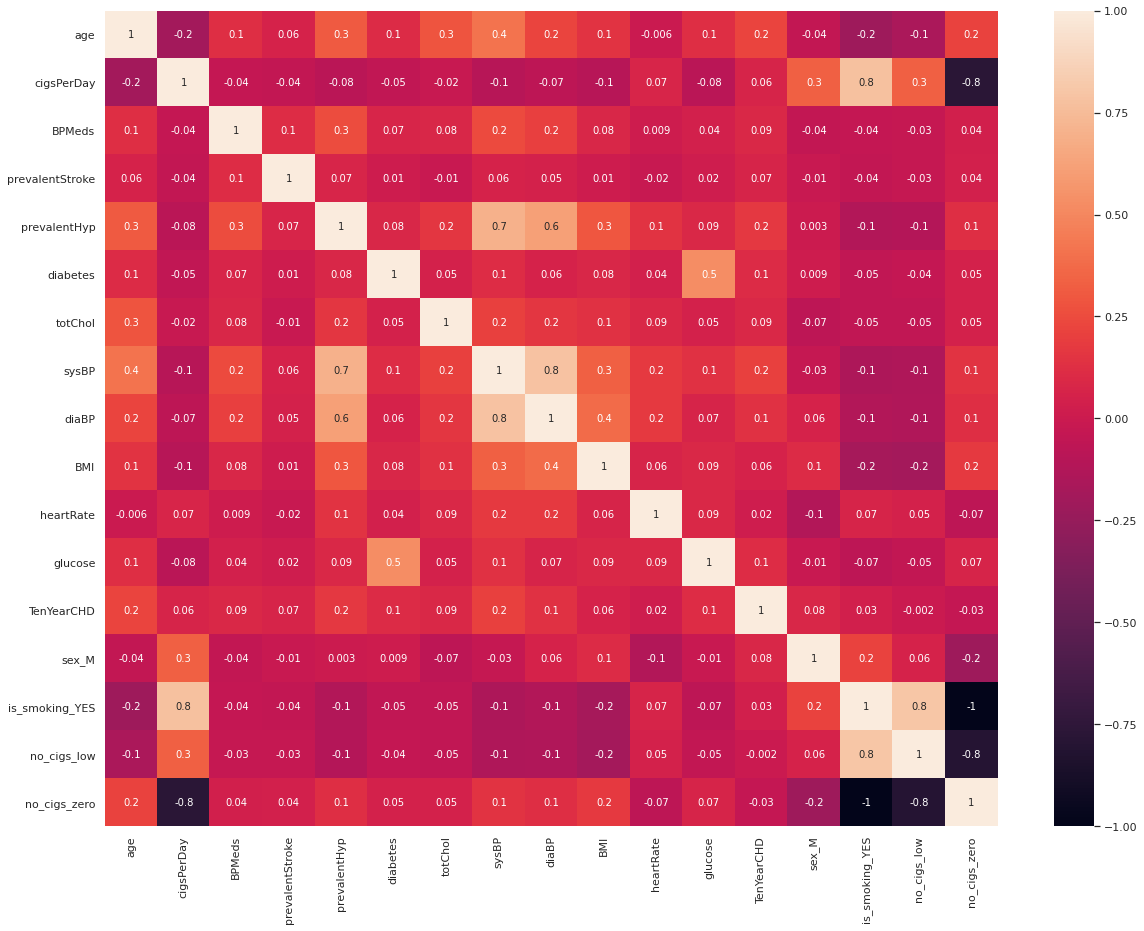

In [ ]:
# checking the correlation after transforming features

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, fmt='.1g')
plt.show()

In [ ]:
# creating X and y

X = df.drop(['TenYearCHD', 'cigsPerDay'], axis=1)
y = df.loc[:, 'TenYearCHD']

In [ ]:
X.head()

age  BPMeds  prevalentStroke  ...  is_smoking_YES  no_cigs_low  no_cigs_zero
0   64     0.0                0  ...               1            1             0
1   36     0.0                0  ...               0            0             1
2   46     0.0                0  ...               1            1             0
3   50     0.0                0  ...               1            1             0
4   64     0.0                0  ...               1            0             0

[5 rows x 15 columns]

In [ ]:
X.shape, y.shape

((3390, 15), (3390,))

In [ ]:
X.describe()

age       BPMeds  ...  no_cigs_low  no_cigs_zero
count  3390.000000  3390.000000  ...  3390.000000   3390.000000
mean     49.542183     0.029499  ...     0.390265      0.502360
std       8.592878     0.169224  ...     0.487882      0.500068
min      32.000000     0.000000  ...     0.000000      0.000000
25%      42.000000     0.000000  ...     0.000000      0.000000
50%      49.000000     0.000000  ...     0.000000      1.000000
75%      56.000000     0.000000  ...     1.000000      1.000000
max      70.000000     1.000000  ...     1.000000      1.000000

[8 rows x 15 columns]

#### Train-Test split

In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=196, stratify=y)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2542, 15) (2542,)
(848, 15) (848,)


#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:1]

array([[ 0.76824189, -0.16703693, -0.08444843, -0.67026774, -0.15548007,
         0.94152613,  0.11255533,  0.09644304, -0.76038531,  0.80162797,
         0.93284875,  1.16068245,  0.99921353,  1.24279706, -0.99921353]])

#### Handling Class Imbalance using - Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [ ]:
print(num_before, num_after)

{0: 2159, 1: 383} {0: 2158, 1: 1727}


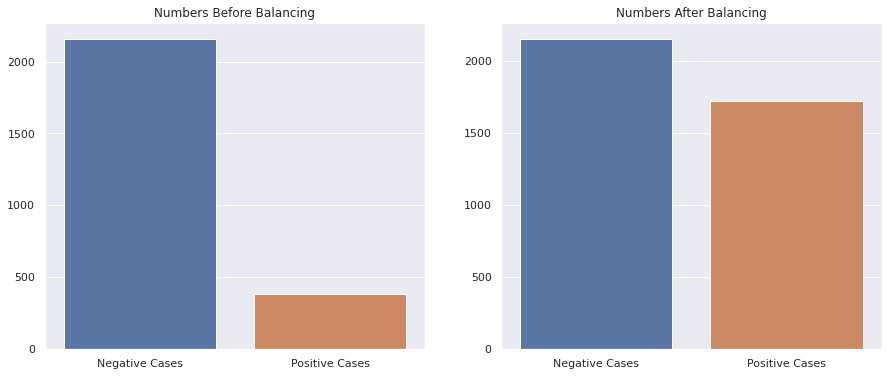

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

### Building the models

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
# define function startified for kfold cross validation

def skfoldcv(model_name, model):  
  kfold = StratifiedKFold(n_splits=5, random_state=7)
  cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='accuracy')
  print(model_name)
  print('\n cross validation results')
  print(cv_results)
  print('mean=', cv_results.mean(), 'std_dev=', cv_results.std())


In [ ]:
skfoldcv('Logisitic Regresison', lr)

Logisitic Regresison

 cross validation results
[0.68597169 0.69111969 0.7039897  0.64221364 0.6962677 ]
mean= 0.6839124839124839 std_dev= 0.021682820786257592


In [ ]:
# Define function for training model, using it for predictions and printing metrics

def build_model(model, param_dict, xtrain, ytrain):

  grid = GridSearchCV(estimator=model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

  grid.fit(xtrain, ytrain)
  optimal_model = grid.best_estimator_

  print('\n\n\n')
  print('Best Parameters =', grid.best_params_)

  return optimal_model

In [ ]:
# Function for prediction and printing metrics

def predict(model_name, optimal_model, xtrain, xtest, ytrain, ytest):

  train_pred = optimal_model.predict(xtrain)
  test_pred = optimal_model.predict(xtest)

  print('Classification report for train')
  print(classification_report(ytrain,train_pred))

  print('\n')
  print('Classification report for test')
  print(classification_report(ytest,test_pred))

  print('\n')
  print('Accuracy for train =', accuracy_score(ytrain, train_pred))
  print('Accuracy for test =', accuracy_score(ytest, test_pred))

  print('\n')
  print('Recall for train =', recall_score(ytrain, train_pred))
  print('Recall for test =', recall_score(ytest, test_pred))

  print('\n')
  print('ROC_AUC score for train =', roc_auc_score(ytrain, train_pred))
  print('ROC_AUC score for test =', roc_auc_score(ytest, test_pred))

  
  cm_train = confusion_matrix(y_smote, train_pred)
  cm_test = confusion_matrix(y_test, test_pred)
  
  conf_matrix_train = pd.DataFrame(data = cm_train, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  conf_matrix_test = pd.DataFrame(data = cm_test, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

  print('\n\n\n\n')
  
  # plt.figure(figsize = (8,5))
  
  f, axes = plt.subplots(1, 2, figsize=(15,7))
  sns.heatmap(conf_matrix_train, annot=True, fmt='d', ax=axes[0])
  axes[0].set_title('Confusion matrix for Train')

  sns.heatmap(conf_matrix_test, annot=True, fmt='d', ax=axes[1])
  axes[1].set_title('Confusion matrix for Test')
  plt.show()

In [ ]:
param_dict_lr = {'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]}

In [ ]:
lr_optimal_model = build_model(lr, param_dict_lr, X_smote, y_smote)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.3s finished


In [ ]:
lr_optimal_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Classification report for train
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2158
           1       0.66      0.60      0.63      1727

    accuracy                           0.69      3885
   macro avg       0.68      0.68      0.68      3885
weighted avg       0.69      0.69      0.69      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       720
           1       0.26      0.54      0.35       128

    accuracy                           0.70       848
   macro avg       0.58      0.63      0.58       848
weighted avg       0.80      0.70      0.74       848



Accuracy for train = 0.6875160875160875
Accuracy for test = 0.7004716981132075


Recall for train = 0.5987261146496815
Recall for test = 0.5390625


ROC_AUC score for train = 0.6786494335991688
ROC_AUC score for test = 0.6341145833333334







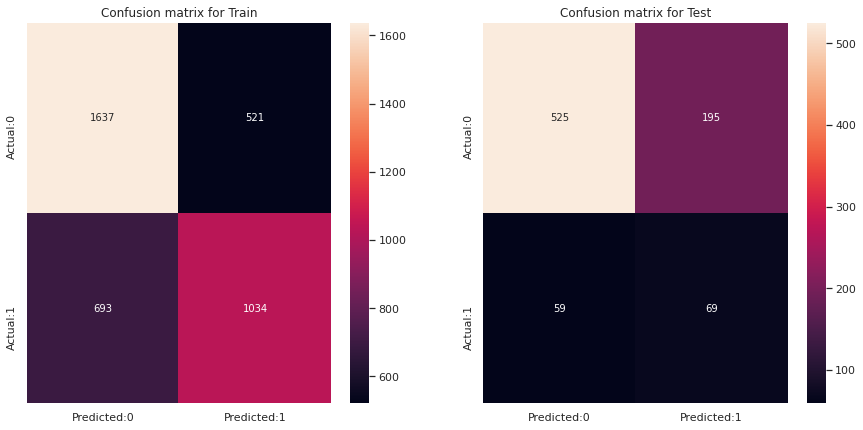

In [ ]:
predict('Logistic Regression', lr_optimal_model, X_smote, X_test, y_smote, y_test)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
skfoldcv('Decision Tree', dt)

Decision Tree

 cross validation results
[0.72844273 0.8018018  0.8005148  0.8018018  0.77863578]
mean= 0.7822393822393823 std_dev= 0.028307007436543696


In [ ]:
param_dict_dt = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[3,4,5,6,7,8,9,10,11]}

In [ ]:
dt_optimal_model = build_model(dt, param_dict_dt, X_smote, y_smote)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] max_features=auto, min_sa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=6 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=7 ......
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1890 out of 1890 | elapsed:   17.2s finished


In [ ]:
dt_optimal_model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>

Classification report for train
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2158
           1       0.86      0.83      0.85      1727

    accuracy                           0.86      3885
   macro avg       0.86      0.86      0.86      3885
weighted avg       0.86      0.86      0.86      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       720
           1       0.19      0.30      0.23       128

    accuracy                           0.70       848
   macro avg       0.52      0.54      0.52       848
weighted avg       0.76      0.70      0.73       848



Accuracy for train = 0.864092664092664
Accuracy for test = 0.7016509433962265


Recall for train = 0.8343949044585988
Recall for test = 0.296875


ROC_AUC score for train = 0.8611270166407915
ROC_AUC score for test = 0.5352430555555556







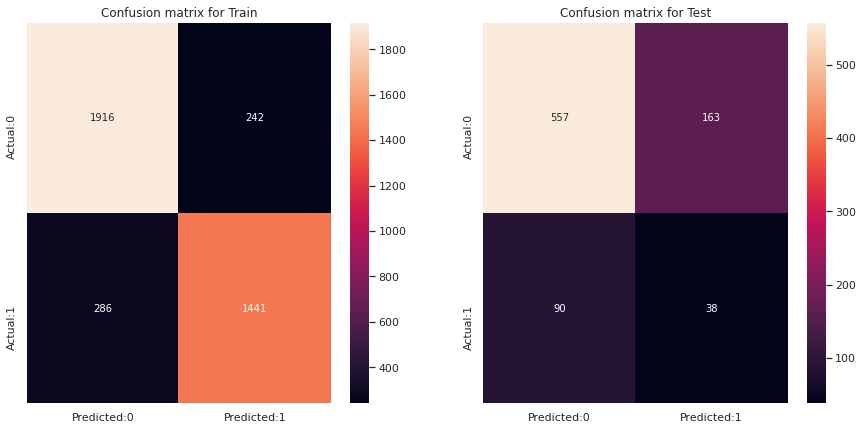

In [ ]:
predict('Decision Tree', dt_optimal_model, X_smote, X_test, y_smote, y_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
skfoldcv('Random Forest', rf)

Random Forest

 cross validation results
[0.85456885 0.87258687 0.8957529  0.88674389 0.88545689]
mean= 0.8790218790218791 std_dev= 0.014285134543641293


In [ ]:
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100],
  }

In [ ]:
rf_optimal_model = build_model(rf, param_dict_rf, X_smote, y_smote)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.1min finished


In [ ]:
rf_optimal_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>

Classification report for train
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2158
           1       0.74      0.68      0.71      1727

    accuracy                           0.75      3885
   macro avg       0.75      0.75      0.75      3885
weighted avg       0.75      0.75      0.75      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       720
           1       0.27      0.50      0.35       128

    accuracy                           0.72       848
   macro avg       0.58      0.63      0.59       848
weighted avg       0.80      0.72      0.75       848



Accuracy for train = 0.7534105534105534
Accuracy for test = 0.7205188679245284


Recall for train = 0.6826867400115808
Recall for test = 0.5


ROC_AUC score for train = 0.746348003926087
ROC_AUC score for test = 0.6298611111111111







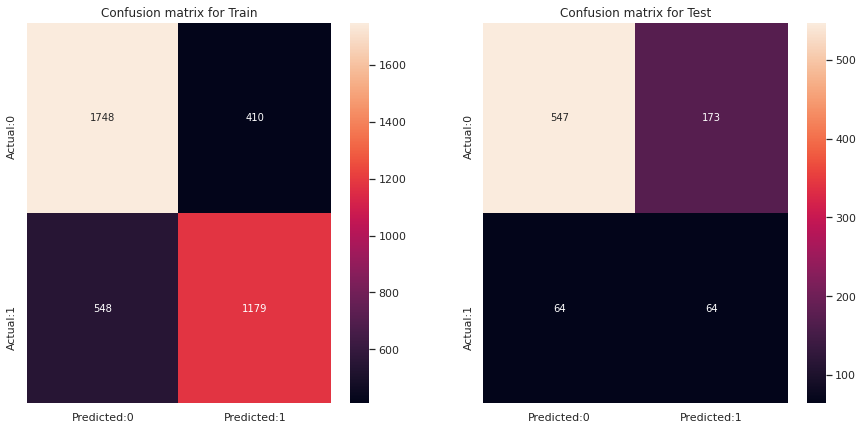

In [ ]:
predict('Random Forest', rf_optimal_model, X_smote, X_test, y_smote, y_test)

In [ ]:
features = X.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

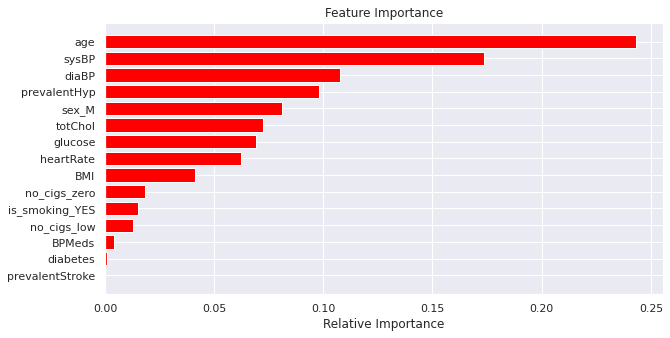

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=0)

In [ ]:
skfoldcv('XGBoost', xgb)

XGBoost

 cross validation results
[0.65637066 0.7992278  0.82239382 0.7953668  0.82754183]
mean= 0.7801801801801802 std_dev= 0.06316226798952208


In [ ]:
param_dict_xgb = {
    'max_depth': range (2, 5, 6),
    'learning_rate': [0.05, 0.01, 0.1],
    'min_child_weight': [1,3,4]
    }

In [ ]:
xgb_optimal_model  = build_model(xgb, param_dict_xgb, X_smote, y_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=1 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=1, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 .............
[CV]  learning_rate=0.05, max_depth=2, min_child_weight=3, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, min_child_weight=3 ......

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    8.1s finished






Best Parameters = {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1}


In [ ]:
xgb_optimal_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

Classification report for train
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2158
           1       0.77      0.70      0.73      1727

    accuracy                           0.77      3885
   macro avg       0.77      0.77      0.77      3885
weighted avg       0.77      0.77      0.77      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       720
           1       0.27      0.44      0.33       128

    accuracy                           0.73       848
   macro avg       0.58      0.61      0.58       848
weighted avg       0.79      0.73      0.76       848



Accuracy for train = 0.774002574002574
Accuracy for test = 0.7346698113207547


Recall for train = 0.7012159814707586
Recall for test = 0.4375


ROC_AUC score for train = 0.766734033367446
ROC_AUC score for test = 0.6125







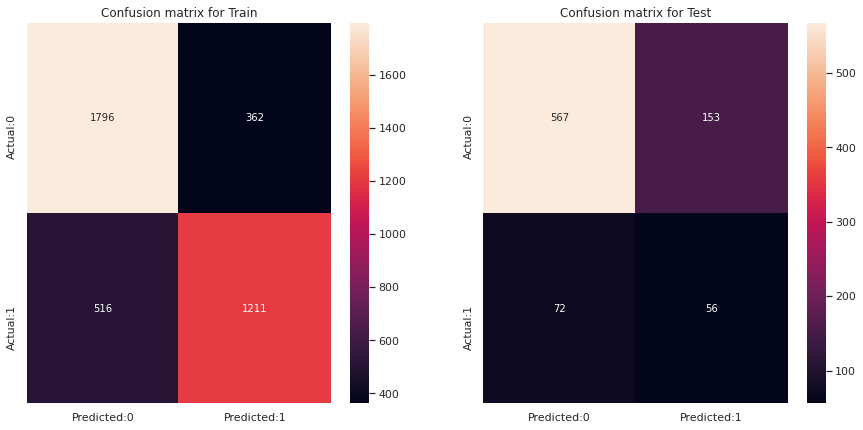

In [ ]:
predict('XGBoost', xgb_optimal_model, X_smote, X_test, y_smote, y_test)

### Conclusion

In [ ]:
models = [lr_optimal_model, dt_optimal_model, rf_optimal_model, xgb_optimal_model]

In [ ]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(4)
        df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(4)
        df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(4)
        
        i+=1

    return(df)

In [ ]:
model_metrics = score_model(X_smote,y_smote,X_test,y_test)
model_metrics

Model_Name  Train accuracy  ...  Train ROC-AUC  Test ROC-AUC
0      LogisticRegression          0.6875  ...         0.6786        0.6341
1  DecisionTreeClassifier          0.8641  ...         0.8611        0.5352
2  RandomForestClassifier          0.7534  ...         0.7463        0.6299
3           XGBClassifier          0.7740  ...         0.7667        0.6125

[4 rows x 7 columns]

We can see that Random Forest and XGBoost classifiers perform better. However, decision tree overfits the data.


### SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 23.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=3e6ccdc2baaa8b4c3d2b6f114aff38f38457b4998d66cf95d18f740115bd5df2
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer_train = shap.TreeExplainer(xgb_optimal_model)
shap_values_train = explainer_train.shap_values(X_smote)

In [ ]:
shap_values_train[1]

array([ 0.49129584,  0.        ,  0.        ,  0.24144234,  0.        ,
        0.05209534,  0.30415633,  0.00990913, -0.01561128, -0.24295072,
        0.04190508, -0.25020015,  0.11313787, -0.00369216,  0.        ],
      dtype=float32)

In [ ]:
y_smote[1]

0

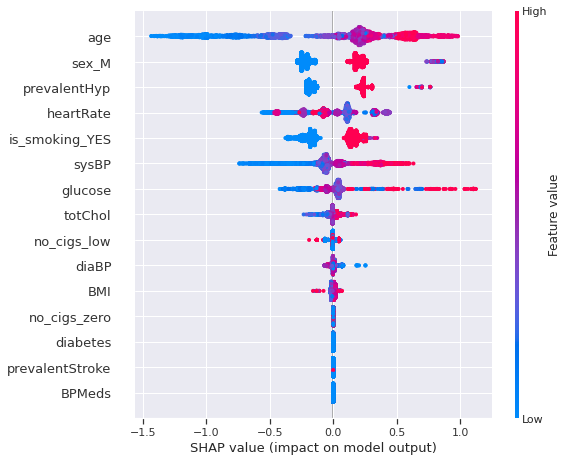

In [ ]:
shap.summary_plot(shap_values_train,X_smote,feature_names=list(X.columns),plot_type='dot')

In [ ]:
explainer_test = shap.TreeExplainer(xgb_optimal_model)
shap_values_test = explainer_test.shap_values(X_test)

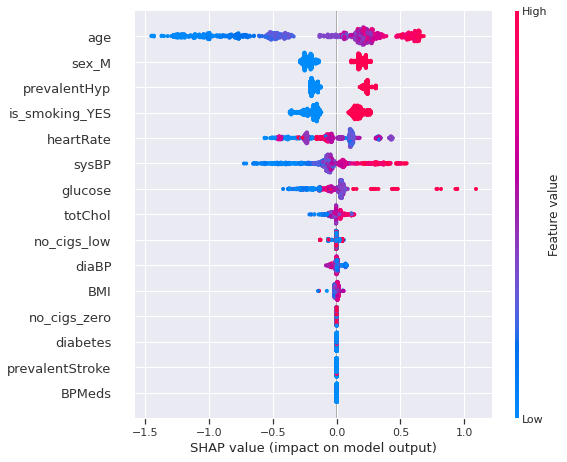

In [ ]:
shap.summary_plot(shap_values_test,X_test,feature_names=list(X.columns),plot_type='dot')

Using SHAP we can see the feature importance and which features are important

In [ ]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_optimal_model)
    shap_values_Model = explainerModel.shap_values(X_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], X_test[j])
    return(p)

In [ ]:
shap.initjs()
shap_plot(1)